In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [95]:
data = pd.read_csv('height_weight_data.csv')
data


,Weight,Height
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


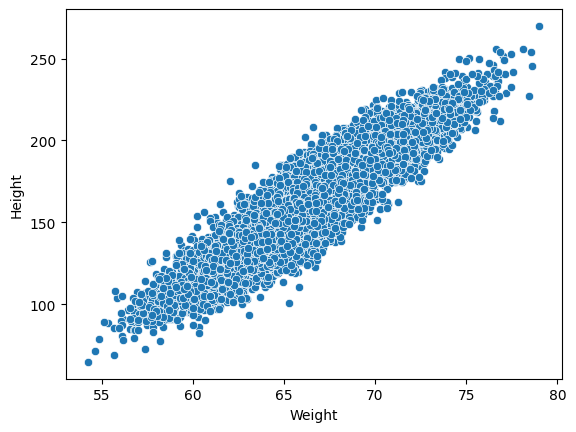

In [96]:
sns.scatterplot(data = data, x = 'Weight', y = 'Height')
plt.show()

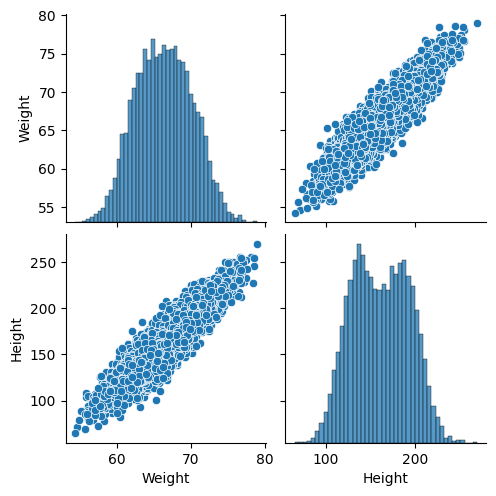

In [97]:
sns.pairplot(data)

In [98]:
data.isnull().sum()

Weight    0
Height    0
dtype: int64

Our independent features that is the x should always be in 2d array or dataframe format but y should be 1d array or series

In [99]:
x = data[['Weight']]
x

,Weight
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
9995,66.172652
9996,67.067155
9997,63.867992
9998,69.034243


In [100]:
y = data['Height']
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Height, Length: 10000, dtype: float64

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7000, 1), (3000, 1), (7000,), (3000,))

In [102]:
x_train = np.array(x_train)
x_test = np.array(x_test)

### In standardisation we basically subtract mean from data and then divide it by standard deviation which makes the data of mean 0 and standard deviation 1

In [103]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train, x_test

(array([[-0.73721827],
        [ 1.26207534],
        [-1.11811827],
        ...,
        [-0.51882636],
        [ 0.71632541],
        [ 0.32993404]]),
 array([[ 0.6156061 ],
        [ 0.65256416],
        [ 0.02025144],
        ...,
        [ 0.92672102],
        [-1.05428678],
        [ 1.35454897]]))

In [104]:
reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

Getting the coefficient basically gives out the weight of the features and intercept is the constant b

In [105]:
reg.coef_, reg.intercept_

(array([29.58846002]), 161.03928298065136)

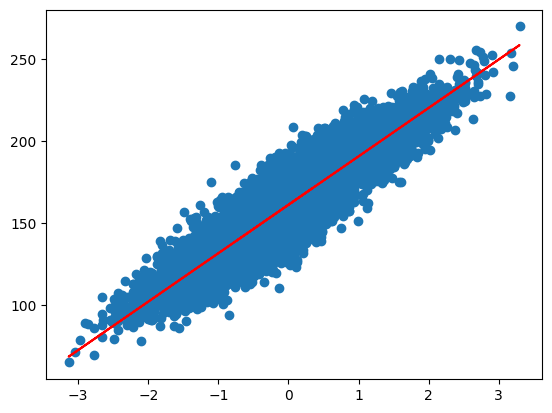

In [106]:
pred = reg.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, pred, color = 'r')
plt.show()

In [107]:
pred = reg.predict(x_test)
mse = mean_squared_error(pred, y_test)
mae = mean_absolute_error(pred, y_test)
mse, mae

(148.3622953748697, 9.709435606344522)

## R Square
### Formula for R^2  

R^2 = 1-SSR/SST

SSR = Sum of Square Residuals

SST = Total sum of squares

In [108]:
score = r2_score(pred, y_test)
score

0.8310382582775445

## Adjusted R Square

Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]

n = numer of observations

k = number of predictor variables

In [109]:
adj_score = 1 - (((1-score)*(len(y_test) - 1))/(len(y_test) - x_test.shape[1] - 1))
adj_score

0.8309819001248686

## Linear Regression with OLS

Uptil this we did found the coeff and intercept through sklearn but we can also find it through OLS which directly provides us a formula to implement to find both of them

In [110]:
import statsmodels.api as sm

In [111]:
model = sm.OLS(y_train, x_train).fit()

In [112]:
pred = model.predict(x_test)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              234.9
Date:                Tue, 15 Oct 2024   Prob (F-statistic):                    3.53e-52
Time:                        03:39:59   Log-Likelihood:                         -45524.
No. Observations:                7000   AIC:                                  9.105e+04
Df Residuals:                    6999   BIC:                                  9.106e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            29.5885      1.930     15.327      0.000      25.804      33.373
==============================================================================
Omnibus:                        1.460   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                1.487
Skew:                           0.034   Prob(JB):                        0.475
Kurtosis:                       2.976   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
reg.predict(scaler.transform(np.array([[68]])))

array([173.96557542])